# Weekly activities
1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?
2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.
3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

In [3]:
#Exercise 1
import cv2
import numpy as np

# Load the image
image = cv2.imread('native-bee.png')

# Define the 3x3 sharpening kernel
kernel_3x3 = np.array([
    [0, -1,0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float32)

# Define the 5x5 sharpening kernel
kernel_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 25, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
], dtype=np.float32)

# Apply the 3x3 kernel
sharpened_3x3 = cv2.filter2D(image, -1, kernel_3x3)

# Apply the 5x5 kernel
sharpened_5x5 = cv2.filter2D(image, -1, kernel_5x5)

# Save and display the results
cv2.imwrite('sharpened_3x3.png', sharpened_3x3)
cv2.imwrite('sharpened_5x5.png', sharpened_5x5)

cv2.imshow('Original Image', image)
cv2.imshow('Sharpened with 3x3 Kernel', sharpened_3x3)
cv2.imshow('Sharpened with 5x5 Kernel', sharpened_5x5)
cv2.waitKey(0)
cv2.destroyAllWindows()


3x3 Kernel : emphasizes differences between adjacent pixels and central pixel which enhance edges in the image

5x5 Kernel : puts more weight to the centrel pixel and negative weights around it which result in a stronger edge enhancement and makes more noise .

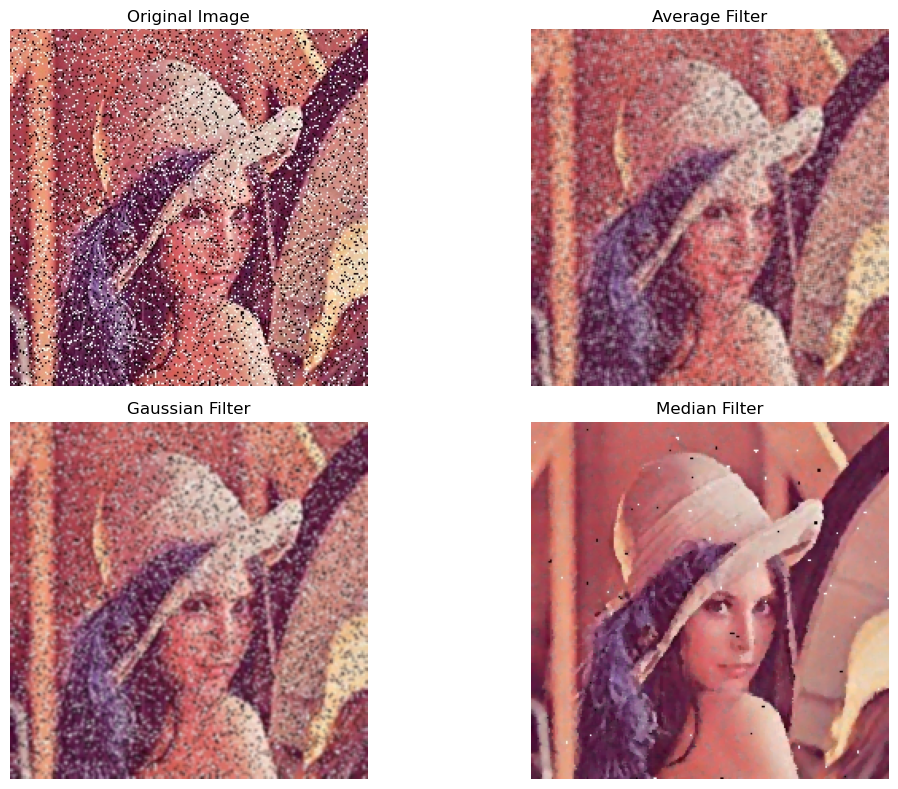

In [4]:
#Exercise 2
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the noisy image
image = cv2.imread('noise_lena.jpg')

# Convert image to RGB (OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Average Filter (3x3)
average_filter = cv2.blur(image, (3, 3))

# Apply Gaussian Filter (3x3)
gaussian_filter = cv2.GaussianBlur(image, (3, 3), 0)

# Apply Median Filter (3x3)
median_filter = cv2.medianBlur(image, 3)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Average Filter')
plt.imshow(average_filter)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Gaussian Filter')
plt.imshow(gaussian_filter)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Median Filter')
plt.imshow(median_filter)
plt.axis('off')

plt.tight_layout()
plt.show()


#Comment on outcomes
1.Average Filter : blur image averagingly but it also blur the edges which decreases the overall sharpness

2.Gaussian Filter: preserves edges better than average Filter and it keeps better image quality

3.Median Filter : Replace each pixel with median value of the neighborhood , which is highly effective for salt-and-pepper in here.

In [25]:
import cv2
import numpy as np

image = cv2.imread('boat.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to get darker regions
# Adjust the threshold value as needed
_, binary_thresh = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the detected contours
for contour in contours:
    # Get bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)
    # Draw rectangle (green color, 2px thickness)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Save and display the result
cv2.imwrite('boat_darker_regions.jpg', image)
cv2.imshow('Darker Regions Highlighted', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Useful links:
- Learn more about different types of image filters: https://setosa.io/ev/image-kernels/